0.9623560279272468


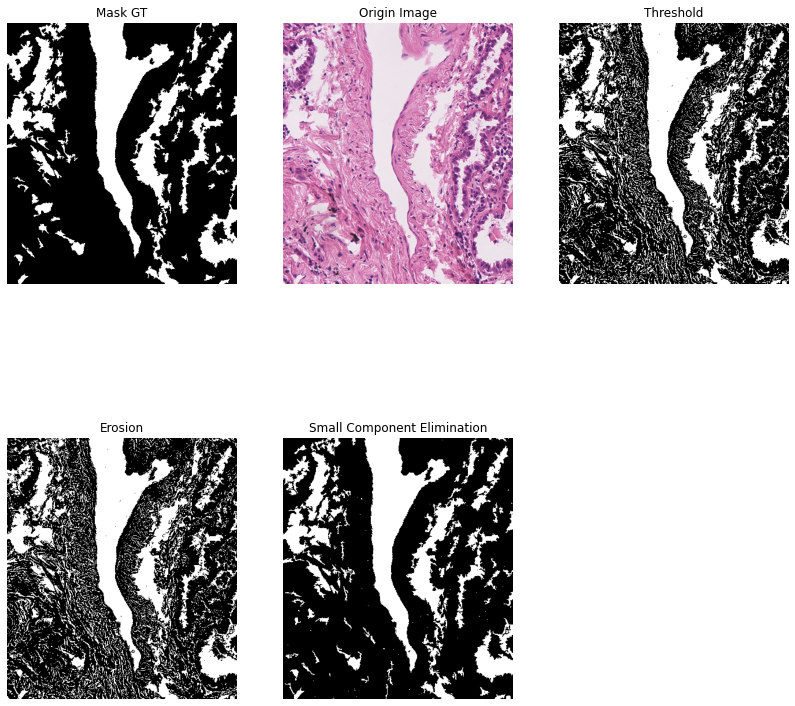

In [69]:
from skimage.measure import label, regionprops
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import cv2
import copy
from skimage.filters import threshold_otsu
from skimage.color import rgb2gray
import os

index = 4
mask_path = f'Dataset/2.validation/background-mask/{index:02d}.png'
image_path = f'Dataset/2.validation/img/{index:02d}.png'

mask_gt = Image.open(mask_path)
image = Image.open(image_path)

# threshold
image_t = np.asarray(image)
# image_t = cv2.cvtColor(image_t, cv2.COLOR_RGB2GRAY)
temp = cv2.cvtColor(image_t, cv2.COLOR_RGB2HSV)
# threshold = 30
threshold1 = threshold_otsu(temp[:,:,1])
threshold2 = threshold_otsu(temp[:,:,2]) 
image_t[temp[:,:,1] < threshold1] = [255, 255, 255]
image_t[temp[:,:,1] >= threshold1] = [0, 0, 0]
image_t[temp[:,:,2] > 230] = [255, 255, 255]
image_t[temp[:,:,2] <= 230] = [0, 0, 0]
# image_t = cv2.cvtColor(image_t, cv2.COLOR_GRAY2RGB)

# erode
erosion_size = 0
erosion_shape = 2
element = cv2.getStructuringElement(erosion_shape, (2 * erosion_size + 1, 2 * erosion_size + 1), (erosion_size, erosion_size))
image_e = cv2.erode(image_t, element)

# connected components filtering
minimal_size = 40
image_c = copy.deepcopy(image_e)
temp = cv2.cvtColor(image_e, cv2.COLOR_RGB2GRAY)
temp[temp == 0] = 2  # prevent recognizing 0 as background
label_image = label(temp, connectivity=1)
for region in regionprops(label_image):
    # take regions with large enough areas
    if region.area <= minimal_size:
        image_c[label_image == region.label] = [255, 255, 255] - image_c[label_image == region.label]

result = image_c[:, :, 1].astype(np.uint8)
result[result == 255] = 1
print(np.sum(np.asarray(mask_gt) == result)/result.size)

fig = plt.figure(1, figsize=(14, 14))

ax1 = fig.add_subplot(231)
ax1.title.set_text('Mask GT')
ax1.axis('off')
ax1.imshow(mask_gt)

ax2 = fig.add_subplot(232)
ax2.title.set_text('Origin Image')
ax2.axis('off')
ax2.imshow(image)

ax3 = fig.add_subplot(233)
ax3.title.set_text('Threshold')
ax3.axis('off')
image_t = Image.fromarray(image_t)
ax3.imshow(image_t)

ax4 = fig.add_subplot(234)
ax4.title.set_text('Erosion')
ax4.axis('off')
image_e = Image.fromarray(image_e)
ax4.imshow(image_e)

ax5 = fig.add_subplot(235)
ax5.title.set_text('Small Component Elimination')
ax5.axis('off')
image_c = Image.fromarray(image_c)
ax5.imshow(image_c)

plt.show()

In [24]:
image_t = np.asarray(image)
image_t = cv2.cvtColor(image_t, cv2.COLOR_RGB2HSV)

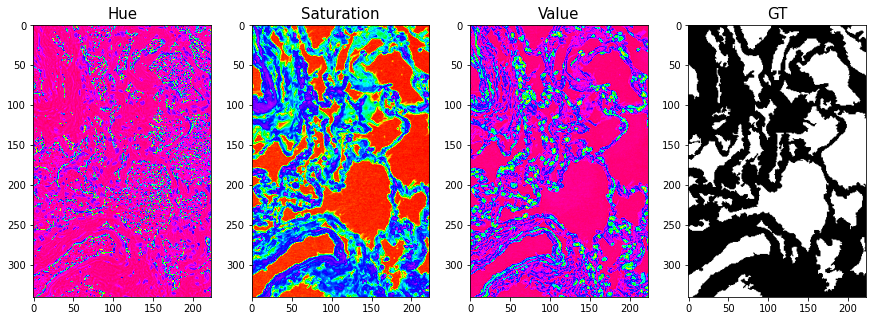

In [44]:
index = 5
mask_path = f'Dataset/2.validation/background-mask/{index:02d}.png'
image_path = f'Dataset/2.validation/img/{index:02d}.png'

mask_gt = Image.open(mask_path)
image = Image.open(image_path)

# threshold
image_t = np.asarray(image)
# image_t = cv2.cvtColor(image_t, cv2.COLOR_RGB2GRAY)
image_t = cv2.cvtColor(image_t, cv2.COLOR_RGB2HSV)

fig, ax = plt.subplots(1, 4, figsize=(15, 5))
ax[0].imshow(image_t[:, :, 0], cmap='hsv')
ax[0].set_title('Hue', fontsize=15)
ax[1].imshow(image_t[:, :, 1], cmap='hsv')
ax[1].set_title('Saturation', fontsize=15)
ax[2].imshow(image_t[:, :, 2], cmap='hsv')
ax[2].set_title('Value', fontsize=15)
ax[3].imshow(mask_gt, cmap='binary')
ax[3].set_title('GT', fontsize=15)
plt.show()


In [46]:
image_t[:, :, 2]

array([[245, 212, 152, ..., 243, 243, 241],
       [248, 222, 167, ..., 243, 242, 243],
       [236, 235, 189, ..., 242, 242, 244],
       ...,
       [240, 238, 239, ..., 221, 231, 237],
       [240, 239, 239, ..., 220, 173, 126],
       [238, 239, 236, ..., 185, 106, 104]], dtype=uint8)